# Code to measure energy consumption of a function
- uses: https://pypi.org/project/pyJoules/

In [41]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch 
from pypapi import events, papi_high as high
from pyJoules.energy_meter import measure_energy
from pyJoules.handler.csv_handler import CSVHandler
from pyJoules.handler.pandas_handler import PandasHandler

In [16]:
results_dir = './results/'
func_name = 'foo'

In [18]:

joules_csv = '{}/{}_joules.csv'.format(results_dir, func_name)

print('Saving joules results here: {}'.format(joules_csv))
csv_handler = CSVHandler(joules_csv)
@measure_energy(handler=csv_handler)
def foo(aa):
	# Instructions to be evaluated.
    a = np.fft.fft(aa)
    return a


Saving joules results here: ./results//foo_joules.csv


In [19]:
n_list = [10, 100, 200, 500, 1000, 2000, 5000, 10000]
for n in n_list:
    print(n)
    aa = np.mgrid[0:n:1,0:n:1][0]
    foo(aa)
    
csv_handler.save_data()

10
100
200
500
1000
2000
5000
10000


In [23]:
joules_df = pd.read_csv(joules_csv,sep=';')
joules_df['input_size'] = n_list
joules_df

,timestamp,tag,duration,package_0,dram_0,core_0,uncore_0,input_size
0,1.611365e+09,foo,0.001406,14771.0,3357.0,3846.0,305.0,10
1,1.611365e+09,foo,0.000645,15808.0,3235.0,7202.0,549.0,100
2,1.611365e+09,foo,0.001609,29785.0,6347.0,16662.0,1892.0,200
3,1.611365e+09,foo,0.005413,79895.0,18737.0,48767.0,6530.0,500
4,1.611365e+09,foo,0.017415,168151.0,39978.0,90454.0,20020.0,1000
5,1.611365e+09,foo,0.059838,605773.0,130798.0,388732.0,61951.0,2000
6,1.611365e+09,foo,0.395880,4638538.0,841612.0,3279045.0,419616.0,5000
7,1.611365e+09,foo,1.717055,20774910.0,3782522.0,14566186.0,2057856.0,10000


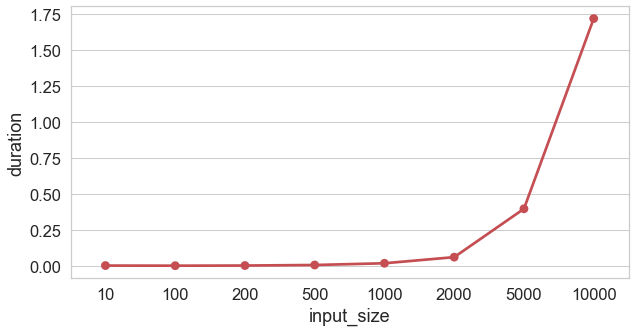

In [40]:
plot_df = joules_df.copy()

sns.set(font_scale = 1.5)
with sns.axes_style("whitegrid"):
    fig, ax1 = plt.subplots(figsize=(10,5),sharex=True,sharey=True)
    g = sns.pointplot(x='input_size',y='duration', color='r', data=plot_df,ax=ax1)

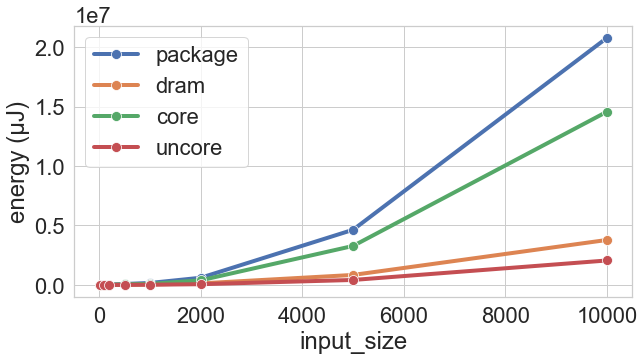

In [39]:
plot_df = joules_df.copy()
sns.set(font_scale = 2)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 10
with sns.axes_style("whitegrid"):
    fig, ax1 = plt.subplots(figsize=(10,5),sharex=True,sharey=True)
    g = sns.lineplot(x='input_size',y='package_0',data=plot_df, marker='o',label='package')    
    g = sns.lineplot(x='input_size',y='dram_0',data=plot_df, marker='o',label='dram')    
    g = sns.lineplot(x='input_size',y='core_0',data=plot_df, marker='o',label='core')    
    g = sns.lineplot(x='input_size',y='uncore_0',data=plot_df, marker='o',label='uncore') 
    plt.ylabel('energy (μJ)')
    plt.legend()